In [23]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Text Analysis of Tweets on Net Neutrality
## Molly McNamara

### Introduction

Net neutrality is defined as “the principle that Internet service providers should enable access to all content and applications regardless of the source, and without favoring or blocking particular products or websites.” In the United States the Federal Communications Commission (FCC) has for several years classified the internet as a telecommunications service in order to protect net neutrality. 

In 2018, the net neutrality order was rescinded by the FCC after a 6 month public commentary period.  Interestingly, [text analysis of the FCC comments from the public demonstrated that many, if not the majority, of comments were fake](https://hackernoon.com/more-than-a-million-pro-repeal-net-neutrality-comments-were-likely-faked-e9f0e3ed36a6).  Due to public outcry at the reversal of net neutrality, a measure of disapproval is [expected to be voted upon in the US Senate](https://www.politico.com/story/2018/02/27/democrats-fcc-reverse-net-neutrality-426641).

Twitter is an online news and social media platform with approximately 330 million active users. Given that users of Twitter are by its very nature users of internet services, sentiment analysis of tweets could provide a strong case for lawmakers trying to understand the true public consensus on the subject or how their constituents wish the issue to be handled. Montana and New York, for example, have already enacted its own legal protections to force net neutrality from providers contracted with the state.

By providing a detailed analysis of current tweets on the subject, this information could be used by a political lobbying company to persuade state and national representatives to vote according to the position of the voters they represent.

### The Data

The primary dataset was collected from [Twitter](http://www.twitter.com) using Python and the Tweepy app to gather all tweets with the search terms #NetNeutrality and Net Neutrality from January 22, 2018 through February 26, 2018. This includes not only the text of the tweets but also user information such as username, location and any profile description.  The data collection code can be found [here](https://github.com/bouncebarkrun/Springboard-Data-Science-Career-Track/blob/master/2nd%20Capstone%20Project/Code/Capstone%202%20Import%20of%20Twitter%20Data%20redacted.ipynb).

A [supplemental dataset](https://www.kaggle.com/jeffkao/proc_17_108_unique_comments_text_dupe_count) obtained from Kaggle contains 2,955,182 public comments to the FCC on net neutrality during a 6 month comment period in 2017.  This could prove especially important for the analysis of Twitter data, compared to FCC data, to demonstrate to legislators, via the lobbying organization client, that in fact the public sentiment is not the same as believed from the comments submitted to the FCC.

### Data Wrangling

The Twitter json files were imported into iPython notebook and appended to one another. The format of the data in the json structure was evaluated to determine which fields to extract for this analysis.  A dataframe was generated with the selected features from the Twitter json files.  Duplicate tweet IDs were removed.  The final dataframe consisted of 421,316 observations wth 14 features. The tweet date field was converted to a datetime object.  The tweet text was cleaned and prepared for analysis.

The FCC text data was similarly cleaned and prepared for text analysis.

All data wrangling steps for this dataset can be found [here](https://github.com/bouncebarkrun/Springboard-Data-Science-Career-Track/blob/master/2nd%20Capstone%20Project/Code/Capstone%202%20Data%20Wrangling%20and%20Exploratory%20Data%20Analysis.ipynb).



### Exploratory Data Analysis

#### Twitter Data

The Twitter dataset consists of tweets from January 22 through February 26, 2018.  Notably, there are peaks in tweets around Janary 24 and ~ February 23-25.  On January 24, Burger King released an [internet commercial explaining the importance of net neutrality](https://www.theverge.com/2018/1/24/16927890/burger-king-net-neutrality-ad), which led to a spike in tweets.  On February 23rd, the chair of the FCC Ajit Pai was [honored with a rifle by the National Rifle Association for repealing net neutrality while attending the Conservative Political Action Conference](https://www.reuters.com/article/us-usa-internet/nra-honors-fcc-chair-with-rifle-for-repealing-net-neutrality-idUSKCN1G800N); coming on the heels of the Parkland, Florida high school shooting from February 14th, this again led to a sharp increase in the twitter feed on this subject.

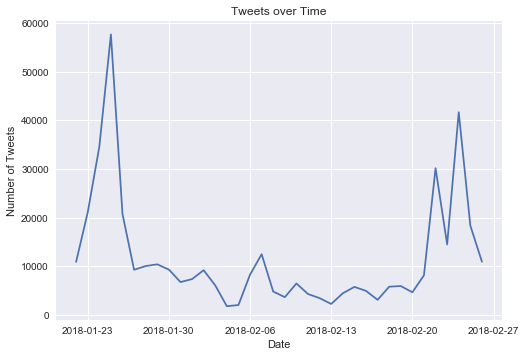

In [13]:
df.groupby(df['tweet_date'].dt.date).size().plot()
plt.title('Tweets over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

The most frequent words in the Twitter data, outside of the search terms for this dataset, are graphed below. 

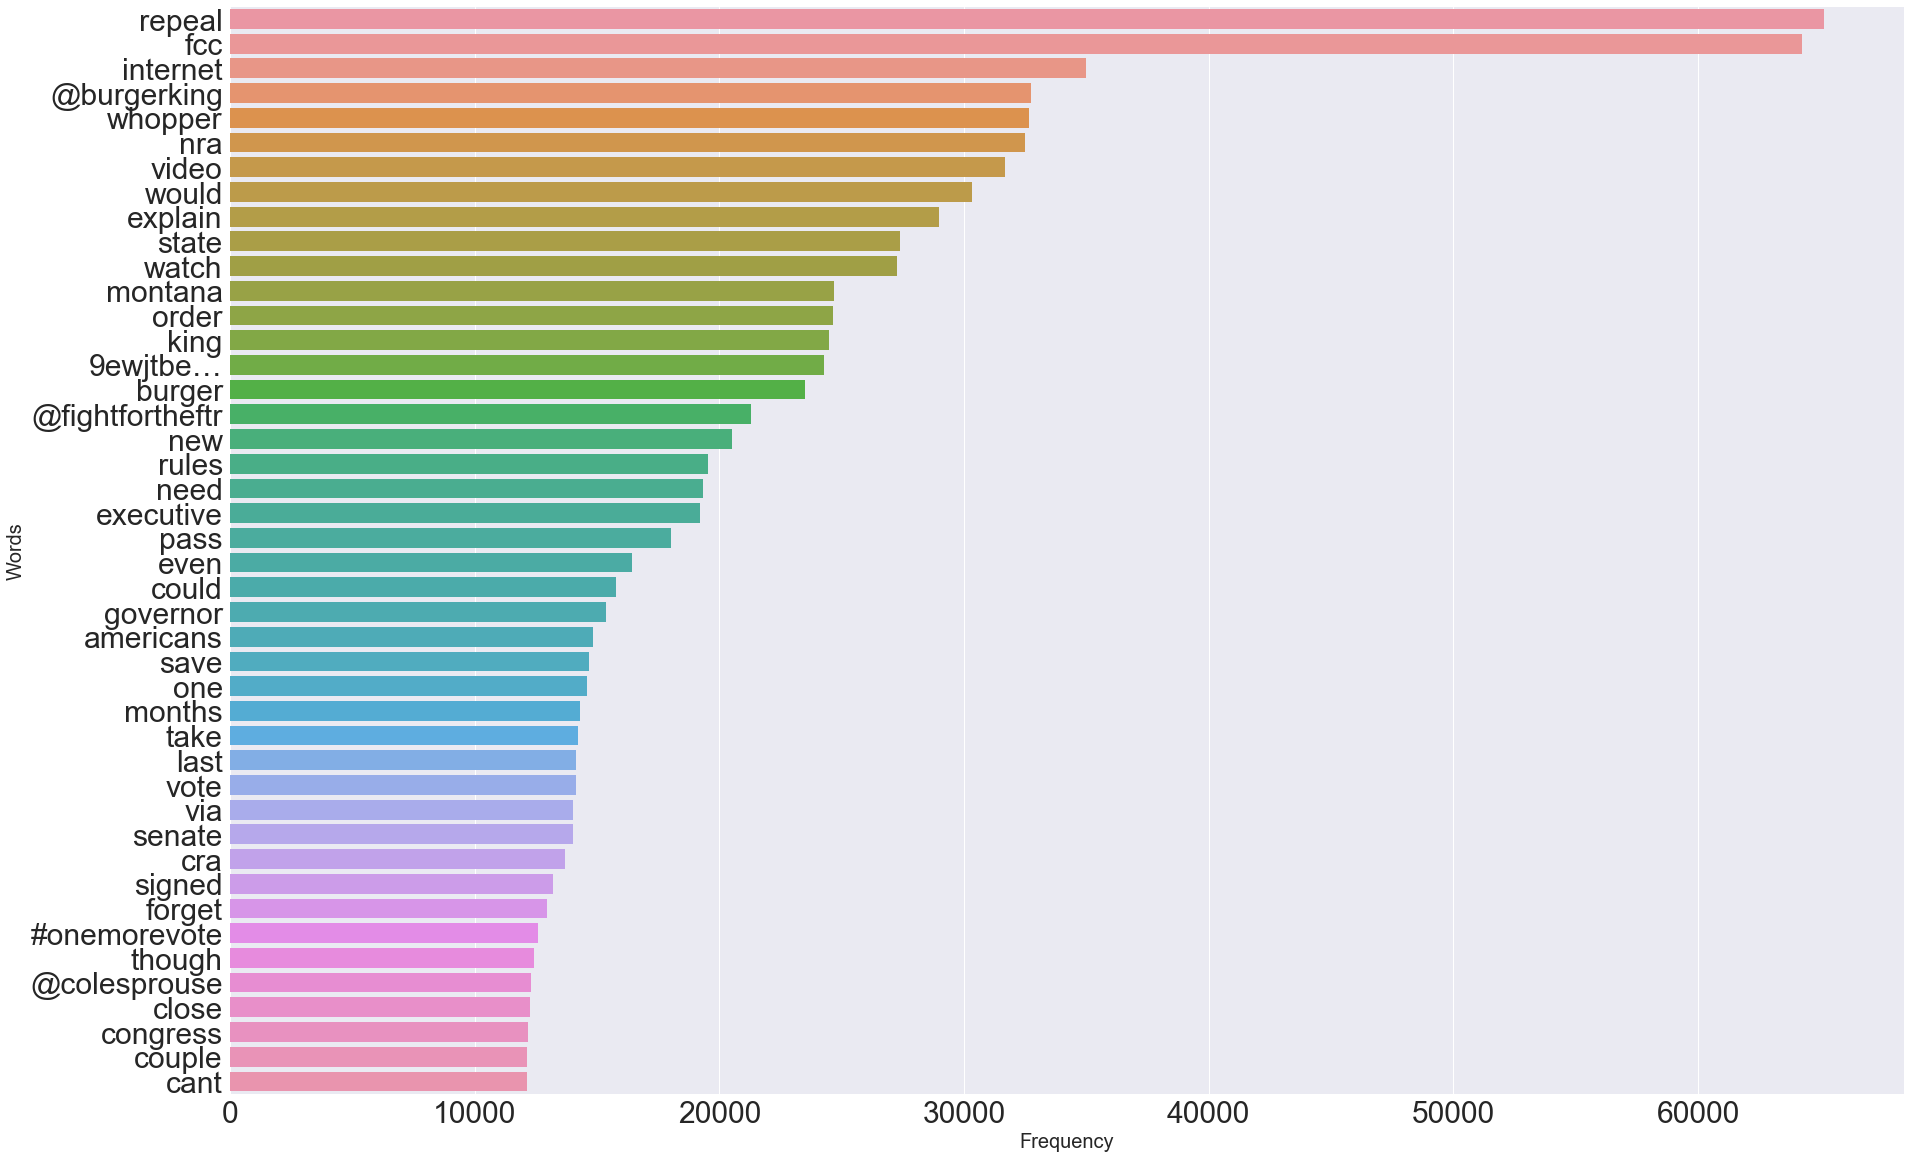

In [19]:
words = (df['text']
           .str.lower()
           .replace([r'\|', RE_stopwords, r"(&amp)|,|;|\"|\.|\?|’|!|'|:|-|\\|/|https"], [' ', ' ', ' '], regex=True)
           .str.cat(sep=' ')
           .split()
)
rslt = pd.DataFrame(Counter(words).most_common(50),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt = rslt.iloc[6:] 
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt.index, x='Frequency', data=rslt)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Words",fontsize=20)
ax.tick_params(labelsize=30)

Word collocations are multiple words that commonly occur together in a text.  Using a Bigram feature of NLTK, the top word co-occurences for the Tweets were identified.

('net', 'neutrality')
('burger', 'king')
('watch', 'video')
('whopper', 'watch')
('would', 'explain')
('@burgerking', 'would')
('executive', 'order')
('explain', 'repeal')
('coverage', 'lessened')
('cant', 'forget')
('forget', 'close')
('…', 'rt')
('lessened', 'last')
('last', 'couple')
('couple', 'months')
('months', 'cant')
('touch', 'overwhelming')
('even', 'though')
('overwhelming', 'majority')
('@colesprouse', 'even')

#### FCC Data

The FCC dataset is a collection of 6 months' worth of public commentary submitted to the FCC regarding the repeal of net neutrality.  

As in the twitter dataset, the most common words in the FCC dataset sample are graphed below. Interestingly they are different from one another.

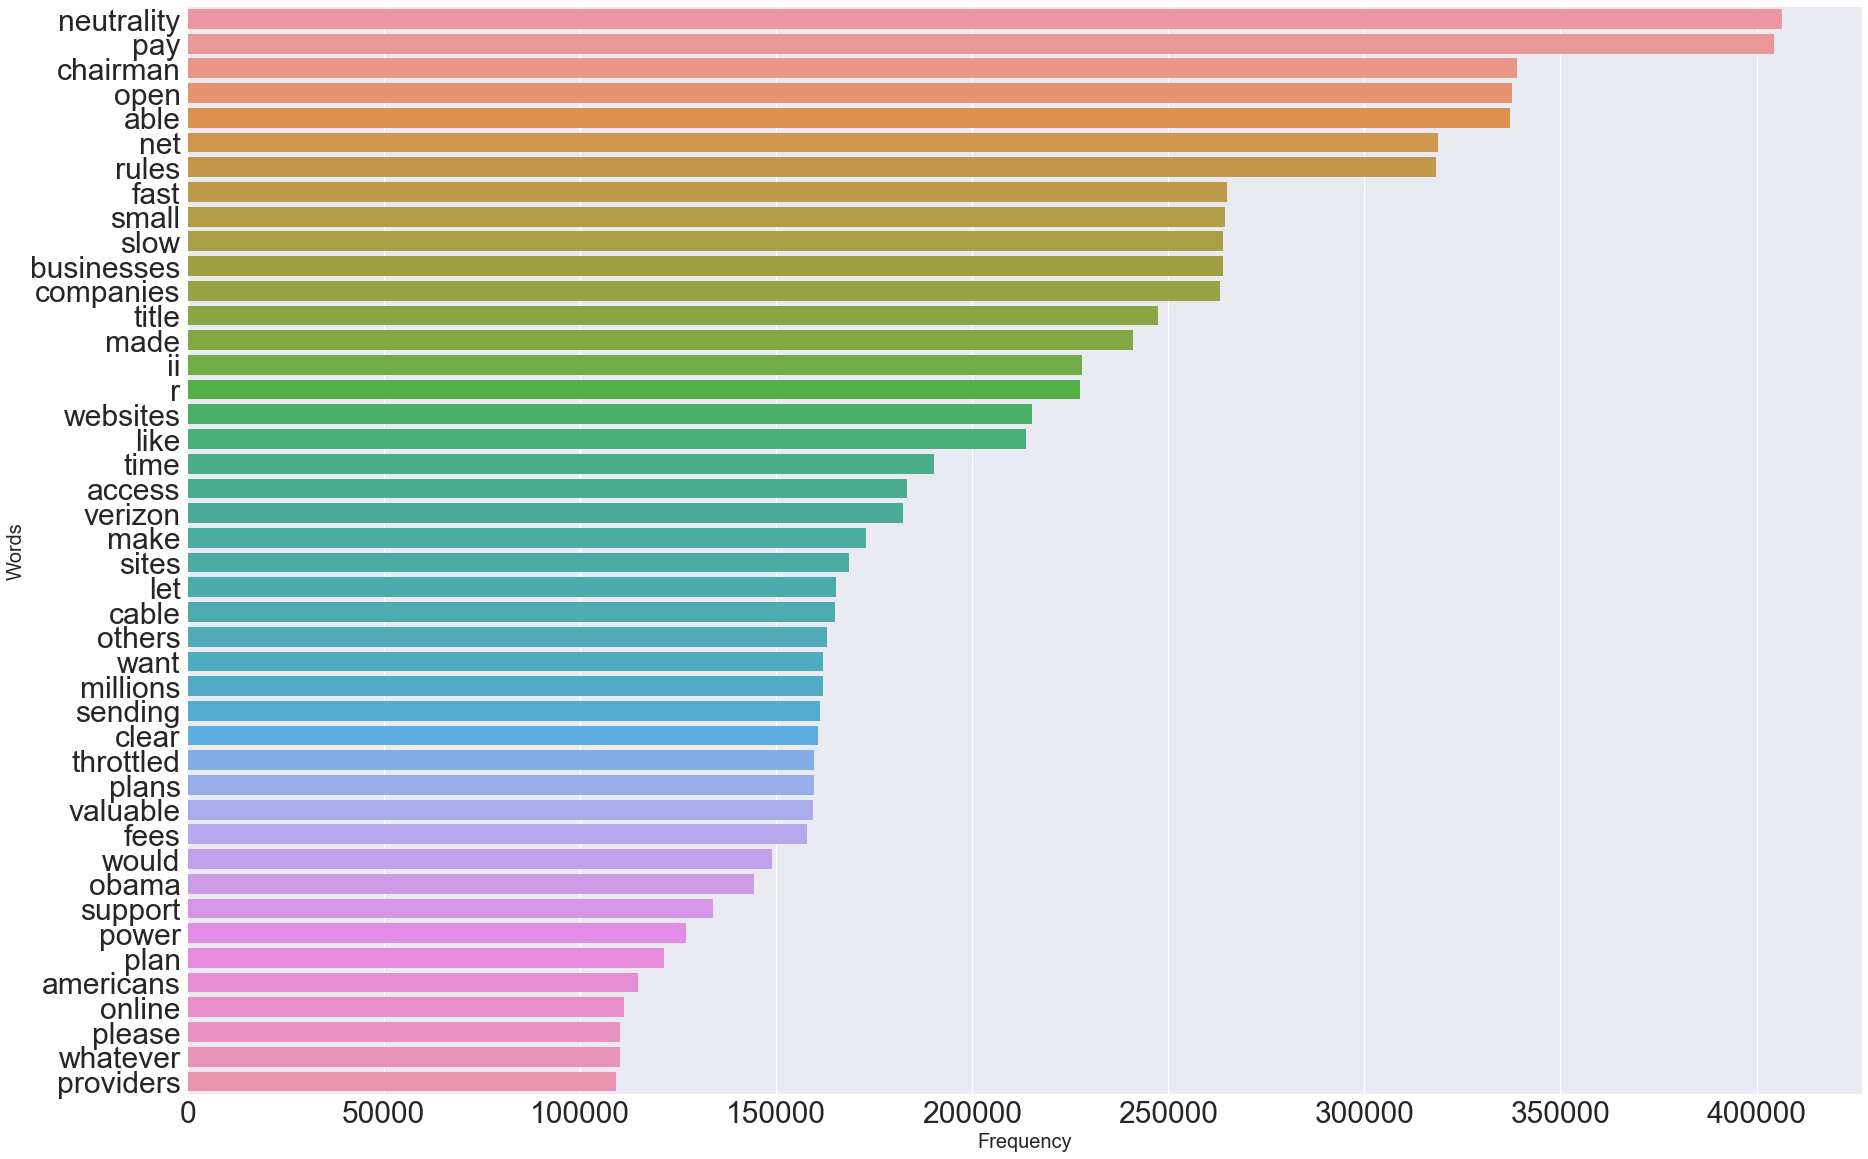

In [26]:
rslt4 = rslt4.iloc[3:]
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [30.0, 20.0]
ax = sns.barplot(y=rslt4.index, x='Frequency', data=rslt4)
ax.set_xlabel("Frequency",fontsize=20)
ax.set_ylabel("Words",fontsize=20)
ax.tick_params(labelsize=30)

The top word co-occurences for the FCC comment set have some phrases in common with the Twitter data but also many differences.

('net', 'neutrality')
('chairman', 'pai')
('title', 'ii')
('fast', 'lanes')
('made', 'clear')
('small', 'businesses')
('league', 'legends')
('members', 'congress')
('famous', 'sky')
('admitted', 'introduce')
('rules)', 'extremely')
('serious', 'problem')
('abysmal', 'customer')
('marketplace', 'enabled')
('prices', 'abysmal')
('game', 'league')
('blogs', 'nonprofits')
('nonprofits', 'artists')
('created', '5')
('popular', 'game')

### Text Analysis

#### Text Clustering

Text clusters were identified using Kmeans clustering on vectorized text.  Clusters were compared using a smaller and larger ngram size in the vectorizer and clusters were more clearly defined with the larger ngram size.

##### Text Clusters - Twitter Data

Top terms in cluster 0:

	signed executive order
	net neutrality rules
	net neutrality repeal
	executive order mandating
	signed executive order mandating
	internet service providers
	cared net neutrality
	becomes first state
	montana becomes first
	montana becomes first state


Top terms in cluster 1:

	touch overwhelming majority americans
	touch overwhelming majority
	could touch overwhelming
	could touch overwhelming majority
	overwhelming majority americans turns
	nra could touch overwhelming
	majority americans turns
	nra could touch
	thought nra could
	thought nra could touch


Top terms in cluster 2:

	the government take away
	the government take
	government take away
	government take away net
	jackedyotweets the government
	jackedyotweets the government take
	away net neutrality guns
	net neutrality guns
	take away net neutrality
	take away net


Top terms in cluster 3:

	why nra position net
	why nra position
	mattyglesias why nra
	mattyglesias why nra position
	position net neutrality regulations
	nra position net neutrality
	nra position net
	position net neutrality
	net neutrality regulations
	lessened last couple months


Top terms in cluster 4:

	we whopper watch video
	neutrality we whopper watch
	we whopper watch
	net neutrality we whopper
	neutrality we whopper
	whopper watch video
	would explain repeal net
	explain repeal net
	explain repeal net neutrality
	repeal net neutrality we

##### Text Clusters - FCC Data

Top terms in cluster 0:

	create internet fast
	create internet fast lanes
	internet users like sincerely
	users like sincerely
	technology users urge keep
	generations technology users urge
	technology users urge
	users urge keep title
	users urge keep
	providers slow block ability


Top terms in cluster 1:

	pay slow lanes
	net neutrality rules
	economy nmoreover chairman pai
	service ninternet providers able
	american economy nmoreover chairman
	economy nmoreover chairman
	abysmal customer service ninternet
	customer service ninternet providers
	service ninternet providers
	small ncourts made clear


Top terms in cluster 2:

	net neutrality it
	open internet it
	the obama wheeler
	the previous administration
	net neutrality title
	strong net neutrality
	neutrality title ii
	net neutrality title ii
	federal communications commission
	obama power grab


Top terms in cluster 3:

	pay slow lanes
	net neutrality rules
	small courts made
	small courts made clear
	large small courts made
	large small courts
	businesses large small courts
	fee chairman pai made
	online censorship isps serious
	lanes websites fee chairman


Top terms in cluster 4:

	microbusinesses like mine
	xe2 x80 x99s
	net neutrality protections
	x80 x99s proposed
	xe2 x80 x99s proposed
	pai xe2 x80
	pai xe2 x80 x99s
	rule allows broadband
	allows broadband providers
	providers negotiate special deals

In general, the text clusters are as follows:

###### Twitter Data
* Montana as the first state to sign an executive order protecting net neutrality
* The NRA and the issue affecting the majority of Americans
* The government taking away rights/guns
* Lessened coverage and regulations as well as the NRA's position on the topic
* The Burger King commercial.

###### FCC Data
* Internet speed
* Customer service
* Strong net neutrality
* The court system
* The FCC chair and the ruling to repeal

#### Topic Modeling

Topic modeling was compared using two different algorithms: LDA (Latent Dirichlet Allocation) and NMF (Non-negative Matrix Factorization).  Each provided slightly different outcomes; the LDA text topics were mapped against each other on a heatmap to visualize overlap of terms and these topic clusters.

##### Twitter Data Topic Clusters

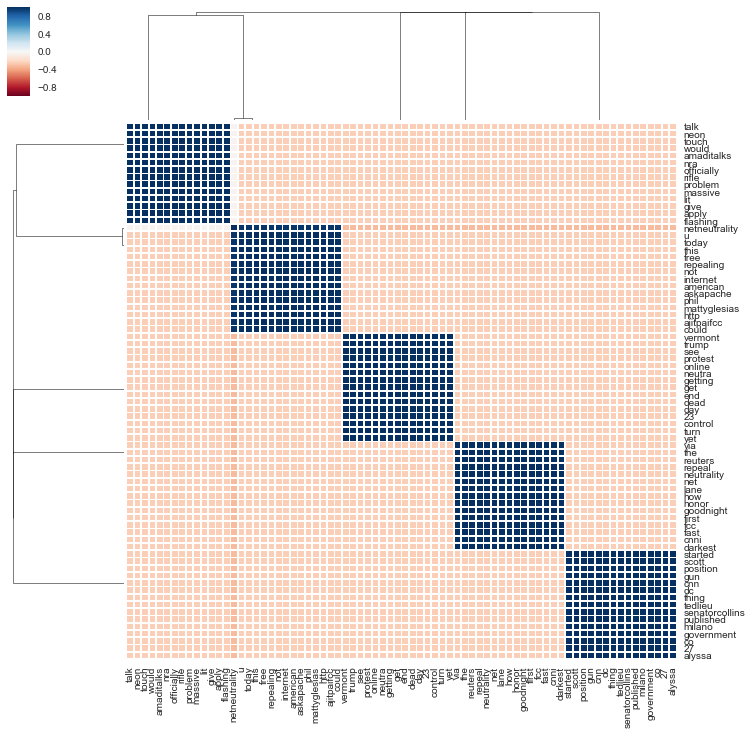

In [29]:
g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

##### FCC Data Topic Clusters

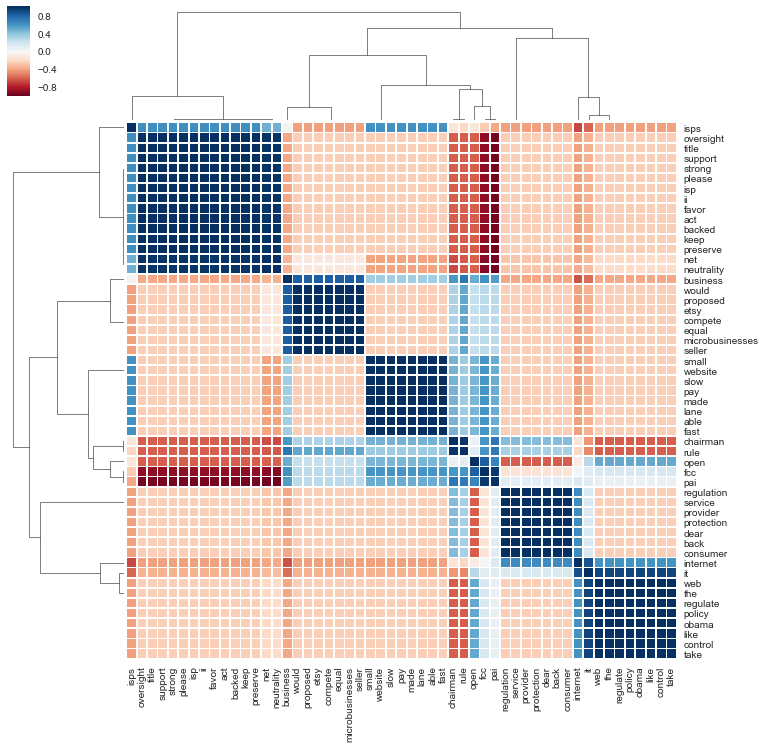

In [53]:
g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

The Twitter text seems to consist of more discrete topics, while the FCC text has commonalities across the topics.

#### Sentiment Analysis

Sentiment analysis was performed using the TextBlob pattern analyzer. Textblob is an API that utilizes NLTK and pattern for processing textual data.

##### Tweet Sentiment

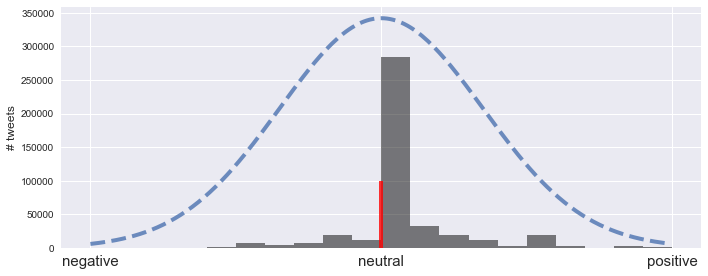

In [32]:
fig, ax = pl.subplots(figsize=(10,4))
df.sentiment.hist(ax=ax, bins=20, color='k', alpha=0.5)
ax.set_xticks(range(-1, 2))
ax.set_xticklabels(['negative', 'neutral', 'positive'], fontsize=15)
ax.set_ylabel('# tweets', fontsize=12)
x = np.arange(-1, 1, 0.01)
ax.plot(x, norm.pdf(x, 0, 0.35) * 300000, '--', linewidth=4, alpha=0.8)
ax.vlines(0, 0, 100000, color='r', linewidth=4, linestyle='-', alpha=0.8)
pl.tight_layout()
pl.show()

The sentiment of the tweets about net neutrality was, on average, positive.  Further investigation into the most positive and negative items indicated that tweets supporting the maintainance of net neutrality were of positive sentiment and negative sentiment was directed towards the idea of a repeal.  That is, the collected tweets were largely in favor of retaining net neutrality.

##### FCC Comment Sentiment

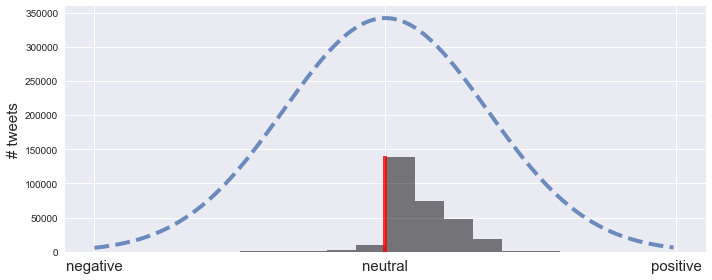

In [55]:
fig, ax = pl.subplots(figsize=(10,4))
fcc.sentiment.hist(ax=ax, bins=20, color='k', alpha=0.5)
# ax.bar(edges, hist, width=width, color='k', alpha=0.5)
ax.set_xticks(range(-1, 2))
ax.set_xticklabels(['negative', 'neutral', 'positive'], fontsize=15)
ax.set_ylabel('# tweets', fontsize=15)
x = np.arange(-1, 1, 0.01)
ax.plot(x, norm.pdf(x, 0, 0.35) * 300000, '--', linewidth=4, alpha=0.8)
ax.vlines(0, 0, 140000, color='r', linewidth=4, linestyle='-', alpha=0.8)
pl.tight_layout()
pl.show()

The FCC dataset was also largely positive in sentiment.  This is where further analysis into the text is so critical, as the positivity in this case is largely directed repealing net neutrality.  Given that this dataset [has been shown to include a large proportion of fake pro-repeal comments](https://hackernoon.com/more-than-a-million-pro-repeal-net-neutrality-comments-were-likely-faked-e9f0e3ed36a6), this assessment fits.

##### Sentiment across the US and in the Senate

Considering that the public commentary submitted to the FCC was used in making the decision to repeal net neutrality, and has since been shown to be highly populated with fake pro-repeal comments, it should be of strong interest for lawmakers to know what the true public sentiment is.  

Currently, the US Senate votes for/against net neutrality fall largely on party lines, with only one dissenting Republican vote in favor of preserving net neutrality.  Senate "sentiment" regarding net neutrality was calculated by state as follows: 1.0 if both of a state's Senators would vote to preserve net neutrality, 0.0 if the state is split between the two, and -1.0 if both Senators would vote against net neutrality.

The average sentiment for the tweets, by state, was generated and compared to the US Senate sentiment.

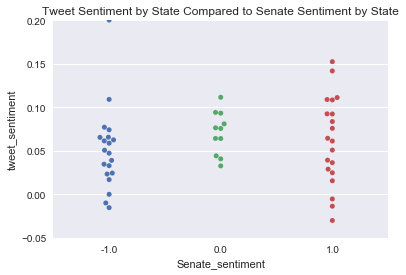

In [47]:
sns.swarmplot(x='Senate_sentiment', y="tweet_sentiment", data=df5)
plt.title('Tweet Sentiment by State Compared to Senate Sentiment by State')
plt.ylim(-0.05, 0.25)
plt.show()

The sentiment of the Senators appears to have very little to do with the sentiment of their constituents, when it comes to net neutrality.  

### Discussion

#### Conclusions

#### Client Recommendations

#### Future Work

Labeled data would have been incredibly useful to generate a predictive model and further evaluate the sentiment of tweets on an ongoing basis.  

#### Code

All project code can be found in its Github repository [here](https://github.com/bouncebarkrun/Springboard-Data-Science-Career-Track/tree/master/2nd%20Capstone%20Project/Code).